<a href="https://colab.research.google.com/github/AdityaSarthak/Action/blob/main/Copy_of_Portfolio_Optimization_using_Markowitz_Model_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [3]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

# stocks = ["HDFCBANK.NS", "ICICIBANK", "INFY.NS", "RELIANCE.NS", "TCS.NS", "ITC.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "ADANIENT.NS", "ASIANPAINT.NS"]
# You can get innovative by choosing different stocks

stocks = ["GHCL.NS","IDFCFIRSTB.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"


THINK!                                                                       
Why have we taken the number of trading days as 252?

PULLING THE DATA AND FORMING A DATABASE

In [4]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-01 00:00:00+05:30,115.294250,NaN,296.704712,NaN,515.869873
2015-10-05 00:00:00+05:30,117.766029,NaN,314.043610,NaN,533.150818
2015-10-06 00:00:00+05:30,116.676773,NaN,332.528534,NaN,513.712708
2015-10-07 00:00:00+05:30,117.388985,NaN,340.151672,NaN,517.565186
2015-10-08 00:00:00+05:30,114.372574,NaN,342.045013,NaN,512.369751
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,617.849976,94.300003,618.700012,1062.050049,506.480377
2023-09-26 00:00:00+05:30,620.549988,95.550003,619.799988,1067.800049,511.299744
2023-09-27 00:00:00+05:30,622.150024,97.550003,620.150024,1081.900024,503.578857


CALCULATING LOG-RETURNS AND ADDING THAT DATA

In [18]:
log_returns =np.log(stock_prices[stocks]/stock_prices[stocks].shift(1)) # your code here

log_returns # should print a similar database as above

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2015-10-05 00:00:00+05:30,0.021212,NaN,0.056794,NaN,0.032950
2015-10-06 00:00:00+05:30,-0.009292,NaN,0.057194,NaN,-0.037140
2015-10-07 00:00:00+05:30,0.006086,NaN,0.022666,NaN,0.007471
2015-10-08 00:00:00+05:30,-0.026032,NaN,0.005551,NaN,-0.010089
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.017965,0.007451,-0.002825,0.000565,-0.004456
2023-09-26 00:00:00+05:30,0.004360,0.013168,0.001776,0.005399,0.009470
2023-09-27 00:00:00+05:30,0.002575,0.020715,0.000565,0.013118,-0.015216


hint: use np.log with the previous dataframe

CALCULATING AVERAGE ANNUAL RETURNS

In [19]:
print(log_returns.mean()*NUM_TRADING_DAYS)

GHCL.NS          0.213833
IDFCFIRSTB.NS    0.044260
TATAMOTORS.NS    0.096166
NH.NS            0.155791
EMAMILTD.NS      0.003352
dtype: float64


CALCULATING ANNUAL VOLATILITY

In [20]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

GHCL.NS          0.411738
IDFCFIRSTB.NS    0.391428
TATAMOTORS.NS    0.437710
NH.NS            0.316831
EMAMILTD.NS      0.323176
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:


1. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

2. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

3. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

4. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

5. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [21]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for i in range(NUM_SIMULATIONS):
    w = np.random.random(size=5)#your code here           #create an array of weights for a portfolio (use np.random.random)
    w=w/(np.sum(w))                           #weights for each stock should be fractional
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

In [22]:
portfolio_risks

[0.22369911646892043,
 0.2690267070255893,
 0.2683998433219454,
 0.23820098630120287,
 0.23008436319817385,
 0.26348057604776104,
 0.3073133718009211,
 0.2665642431730513,
 0.24147266337813925,
 0.25553863942209004,
 0.27638594759106133,
 0.25297505201102266,
 0.25076691153423275,
 0.23303740587365954,
 0.26853129112724283,
 0.27205007610641047,
 0.2584388011767903,
 0.27717407169714553,
 0.26519690110533634,
 0.23896612220289465,
 0.25519790076207716,
 0.2351195653983845,
 0.26393218951077296,
 0.24806943982557586,
 0.23718162081001834,
 0.2460970524406937,
 0.24756100850466053,
 0.2451983221416341,
 0.23628582723311978,
 0.23974360873527112,
 0.23754155784519576,
 0.23791448037700683,
 0.27200796388168,
 0.25941198385146635,
 0.2590768954958666,
 0.2742525934174925,
 0.24473229795181797,
 0.2326424135108623,
 0.24978367643380112,
 0.24415706300636542,
 0.22537731406286757,
 0.235700944176976,
 0.2328866810603121,
 0.27760023342432516,
 0.24966872154300865,
 0.23882238783396997,
 0.25

We assume the RISK FREE RATE to be 7%

In [23]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the different portfolios]

In [24]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios  =(portfolio_returns-risk_free_rate)/portfolio_risks # your code here                         # use the above variables and the formula for sharpe ratio
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

In [25]:
portfolios

,Return,Risk,Sharpe
0,0.111959,0.223699,0.187569
1,0.099225,0.269027,0.108634
2,0.103951,0.268400,0.126495
3,0.081639,0.238201,0.048864
4,0.096307,0.230084,0.114336
...,...,...,...
99995,0.112768,0.261117,0.163788
99996,0.099862,0.268497,0.111221
99997,0.088149,0.254972,0.071182
99998,0.072293,0.271395,0.008450


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

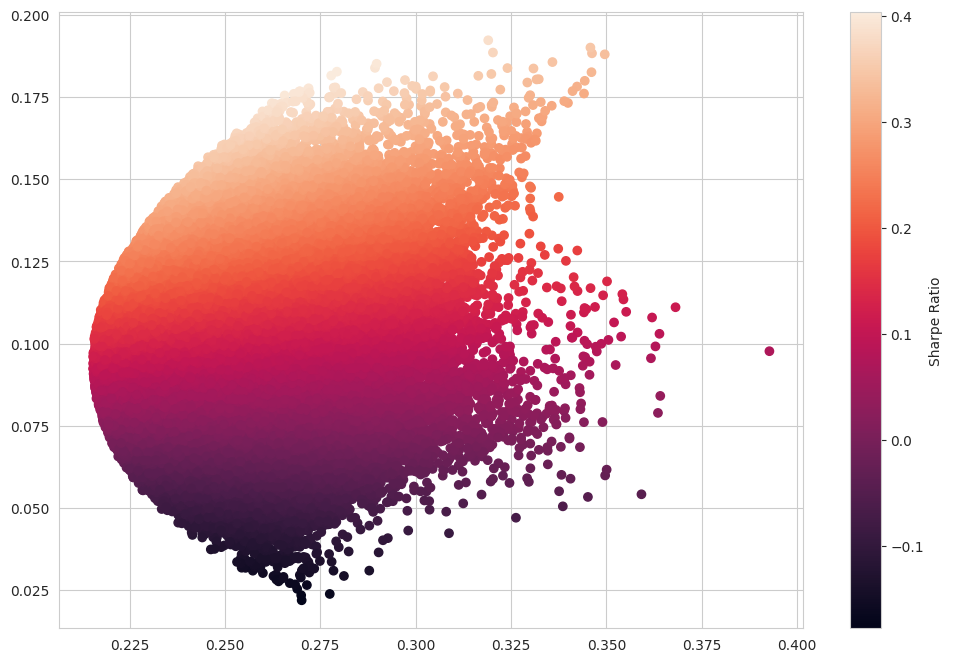

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

First let's find out the Portfolio with the maximum Sharpe Ratio

In [27]:

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [28]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.40342151629655876
Corresponding Return =   0.1826990124192807
Corresponding Risk =   0.2793579615035571


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [29]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.5254837745951906
IDFCFIRSTB.NS : 0.004579009705615273
TATAMOTORS.NS : 0.025093820635590455
NH.NS : 0.43444366879046475
EMAMILTD.NS : 0.010399726273138923


Plotting the point of our portfolio with max sharpe

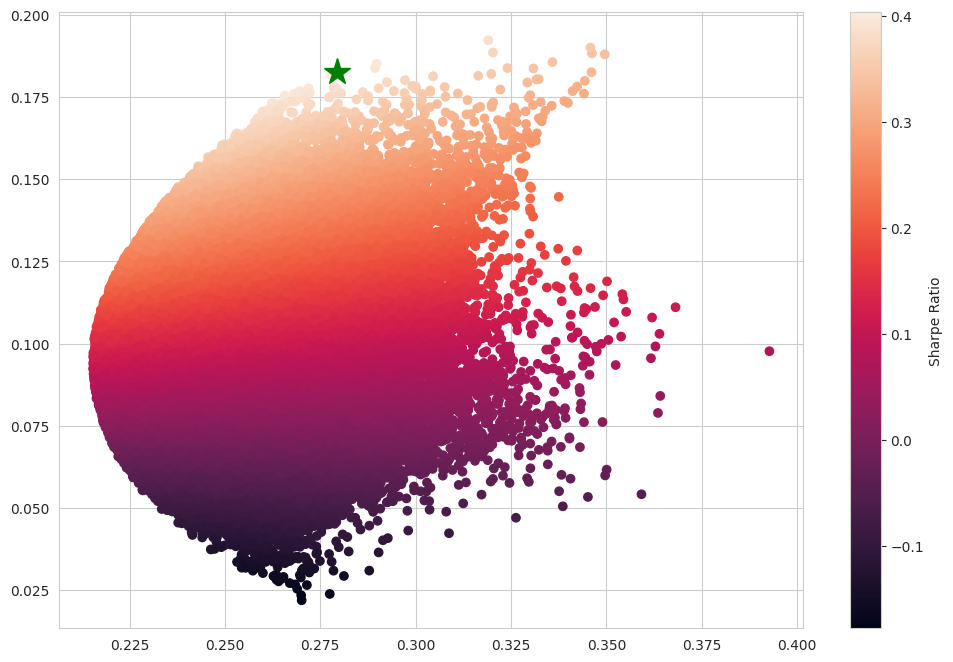

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [31]:
ind = 0
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i] == np.amin(portfolio_risks)):
        ind = i                                   #get the index of the minimum risk portfolio

In [32]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.2154428332004618
Corresponding Return =   0.09238502507585142


In [33]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.09548714082870692
IDFCFIRSTB.NS : 0.13191483797559653
TATAMOTORS.NS : 0.05594037793961731
NH.NS : 0.3827527108573587
EMAMILTD.NS : 0.3339049323987205


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

Plotting the point of our portfolio with minimum risk

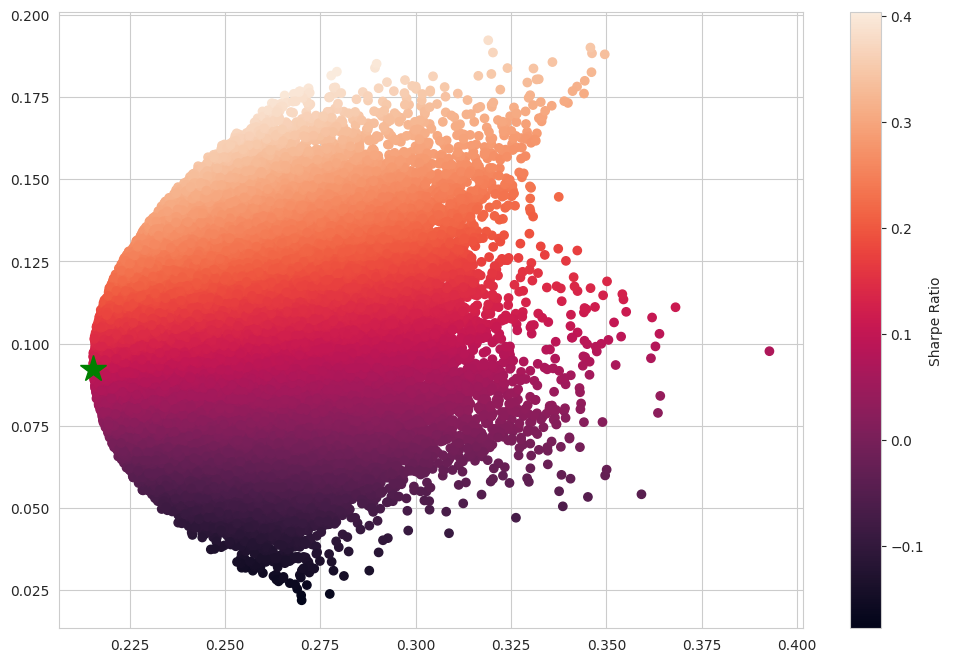

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk